In [ ]:
import xarray as xr
import datetime
import pymannkendall as mk
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import theilslopes

In [ ]:
# I can compare to MODIS data MODIS LST max ! 

In [2]:
# read per year and then concact!
lst_2007 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2007/AVMEA/LST_AVMEA_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [3]:
# read per year and then concact!
lst_2008 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2008/AVMEA/LST_AVMEA_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [4]:
lst_2009 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2009/AVMEA/LST_AVMEA_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [5]:
lst_2010 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2010/AVMEA/LST_AVMEA_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [6]:
lst_2011 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2011/AVMEA/LST_AVMEA_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [7]:
lst_2012 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2012/AVMEA/LST_AVMEA_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [8]:
lst_2013 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2013/AVMEA/LST_AVMEA_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [9]:
lst_2014 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2014/AVMEA/LST_AVMEA_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [10]:
lst_2015 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2015/AVMEA/LST_AVMEA_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [11]:
lst_2016 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2016/AVMEB/LST_AVMEB_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [12]:
lst_2017 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2017/AVMEB/LST_AVMEB_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [13]:
lst_2018 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2018/AVMEB/LST_AVMEB_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [14]:
lst_2019 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2019/AVMEB/LST_AVMEB_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [15]:
lst_2020 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2020/AVMEB/LST_AVMEB_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [16]:
lst_2021 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2021/AVMEB/LST_AVMEB_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [17]:
lst_2022 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2022/AVMEB/LST_AVMEB_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [18]:
lst_2023 = xr.open_mfdataset('/mnt/data7/nfs4/avh_lst/sdupuis/EUSTACE/All_Arctic/2023/AVMEB/LST_AVMEB_All_Arctic__v.11.0__*DAY.nc', engine='netcdf4')

In [19]:
land_cover = xr.open_dataset('/mnt/data7/nfs4/avh_ndvi/sdupuis/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7b.nc', engine='netcdf4')
lc = land_cover.sel(lat=slice(72,55), lon=slice(-168,-150))

In [20]:
lc_interp = lc.interp(lat=lst_2023.coords['lat'], lon=lst_2023.coords['lon'], method='nearest')

In [23]:
# load the time series somewhere ?
# try as monthly max

results = {}

for year in range(2007, 2024):

    ds = globals()[f"lst_{year}"]   # load lst_1981, lst_1982, ...

    # 2. Fixed 10-day bins anchored at Jan 1 every year
    
    ds = ds.where(lc_interp['lccs_class'] != 210)
    print(ds)
    clean_LST = ds['LST'].where(ds['LST'] != 110, np.nan)
    max_mon = (
        clean_LST
        .resample(
            time='1MS'
        )
        .max()
    )

    # Ensure bins exist even with no data
    # Xarray automatically creates them and fills with NaN

    results[year] = max_mon

<xarray.Dataset>
Dimensions:      (lat: 800, lon: 7200, time: 213)
Coordinates:
  * lat          (lat) float32 50.03 50.08 50.12 50.17 ... 89.88 89.93 89.97
  * lon          (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    band         int64 1
    spatial_ref  int64 0
  * time         (time) datetime64[ns] 2007-06-02 2007-06-03 ... 2007-12-31
Data variables:
    LST          (lat, lon, time) float32 dask.array<chunksize=(800, 7200, 1), meta=np.ndarray>
    satzen       (time, lat, lon) float32 dask.array<chunksize=(1, 800, 7200), meta=np.ndarray>
    sunzen       (time, lat, lon) float32 dask.array<chunksize=(1, 800, 7200), meta=np.ndarray>
    scan_time    (time, lat, lon) float32 dask.array<chunksize=(1, 800, 7200), meta=np.ndarray>
    test_mae     (time, lat, lon) float32 dask.array<chunksize=(1, 800, 7200), meta=np.ndarray>
    r2           (time, lat, lon) float32 dask.array<chunksize=(1, 800, 7200), meta=np.ndarray>
<xarray.Dataset>
Dimensions:      (lat: 800,

In [24]:
combined = xr.concat([results[y] for y in range(2007, 2024)], dim="time")

In [29]:
combined

<xarray.DataArray 'LST' (lat: 800, lon: 7200, time: 199)>
dask.array<concatenate, shape=(800, 7200, 199), dtype=float32, chunksize=(800, 7200, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 50.03 50.08 50.12 50.17 ... 89.88 89.93 89.97
  * lon          (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    band         int64 1
    spatial_ref  int64 0
  * time         (time) datetime64[ns] 2007-06-01 2007-07-01 ... 2023-12-01
    bin          (time) int64 6 7 8 9 10 11 12 1 2 3 ... 3 4 5 6 7 8 9 10 11 12

In [ ]:
bin_index = combined.time.dt.month
combined = combined.assign_coords(bin=bin_index)

/local/sdupuis/software/conda/envs/rioxarray_env/lib/python3.11/site-packages/dask/array/reductions.py:649: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


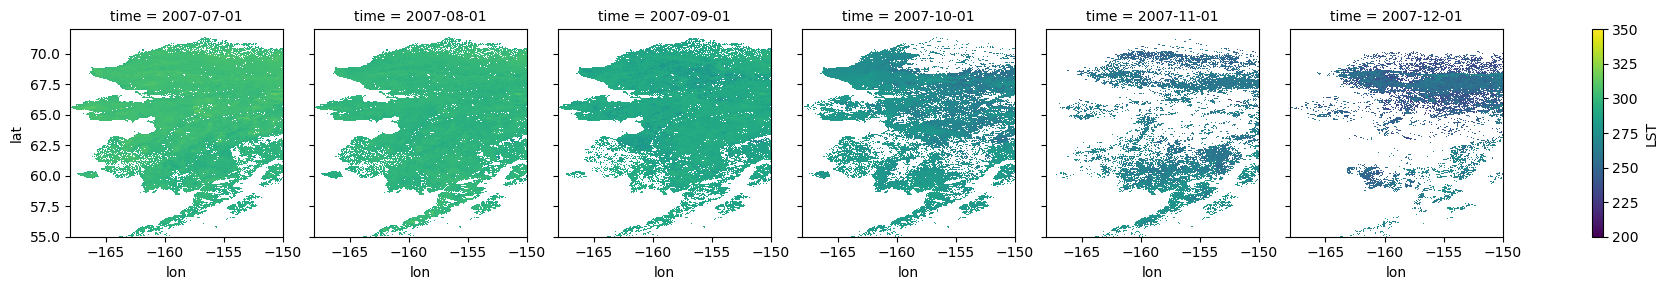

In [30]:
combined.sel(lat=slice(55,72), lon=slice(-168,-150), time=slice('2007-07','2007-12')).plot(x="lon", y="lat", col="time", col_wrap=6, vmax=350, vmin=200);

In [31]:
climatology = combined.groupby("bin").mean("time")

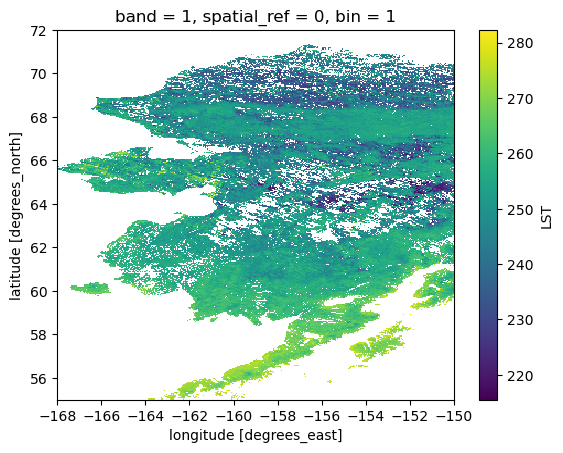

In [32]:
climatology.sel(lat=slice(55,72), lon=slice(-168,-150)).isel(bin=0).plot();

In [ ]:
# there are more clouds in the morning ? more cloudy than mean for NOAA ? blue spots in the middle ? 

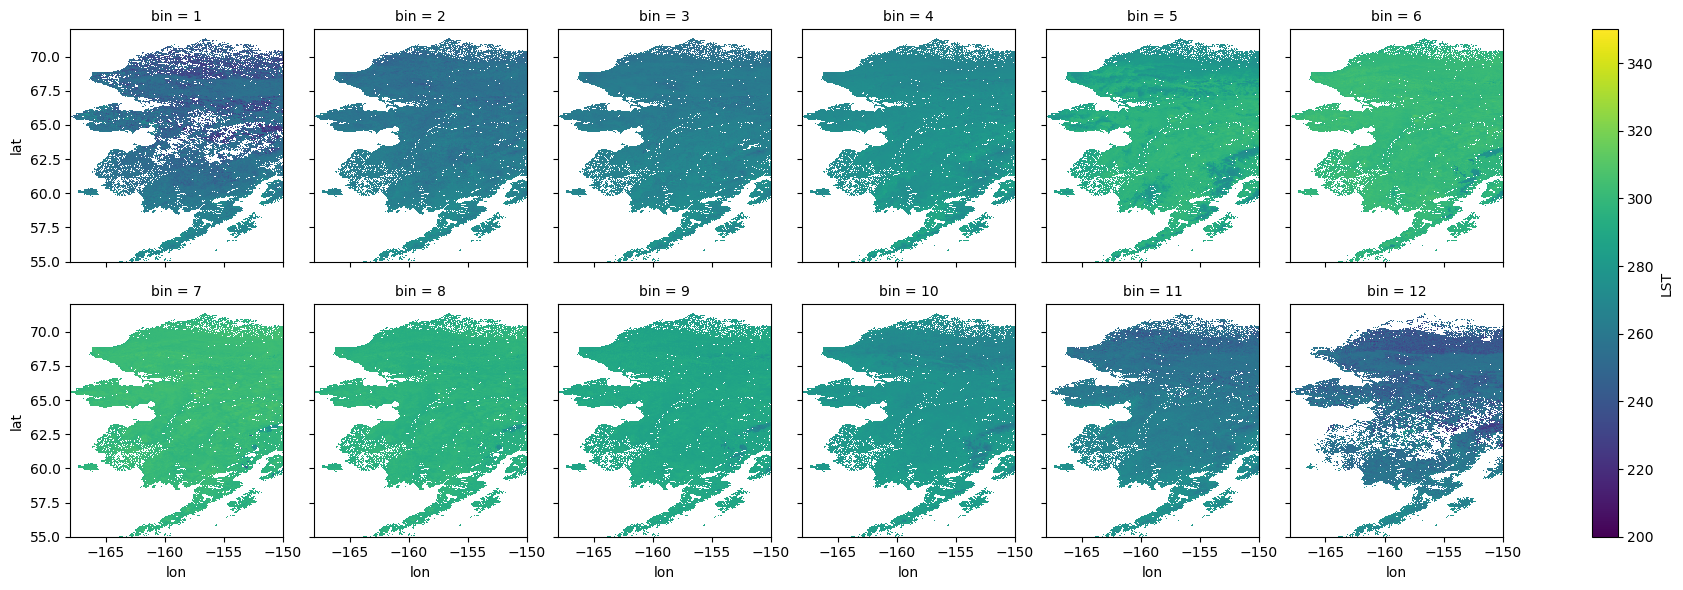

In [33]:
climatology.sel(lat=slice(55,72), lon=slice(-168,-150)).plot(x="lon", y="lat", col="bin", col_wrap=6, vmax=350, vmin=200);

In [34]:
anomalies = combined.groupby("bin") - climatology

/local/sdupuis/software/conda/envs/rioxarray_env/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 17 times more chunks
  return self.array[key]


In [35]:
anomalies

<xarray.DataArray 'LST' (lat: 800, lon: 7200, time: 199)>
dask.array<sub, shape=(800, 7200, 199), dtype=float32, chunksize=(800, 7200, 1), chunktype=numpy.ndarray>
Coordinates:
  * lat          (lat) float32 50.03 50.08 50.12 50.17 ... 89.88 89.93 89.97
  * lon          (lon) float32 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
    band         (time) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    spatial_ref  (time) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
  * time         (time) datetime64[ns] 2007-06-01 2007-07-01 ... 2023-12-01
    bin          (time) int64 6 7 8 9 10 11 12 1 2 3 ... 3 4 5 6 7 8 9 10 11 12

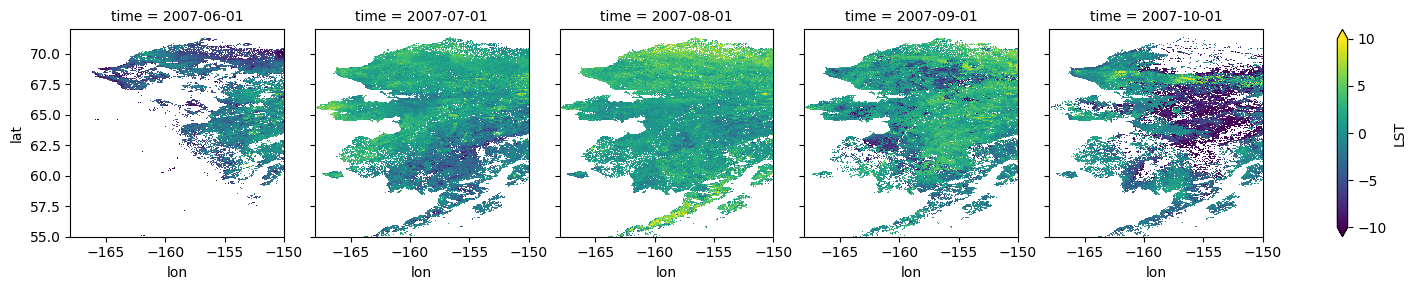

In [37]:
anomalies.sel(lat=slice(55,72), lon=slice(-168,-150), time=slice('2007-05','2007-10')).plot(x="lon", y="lat", col="time", col_wrap=5, vmin=-10, vmax=10);
plt.savefig('anomalies_metop.png')

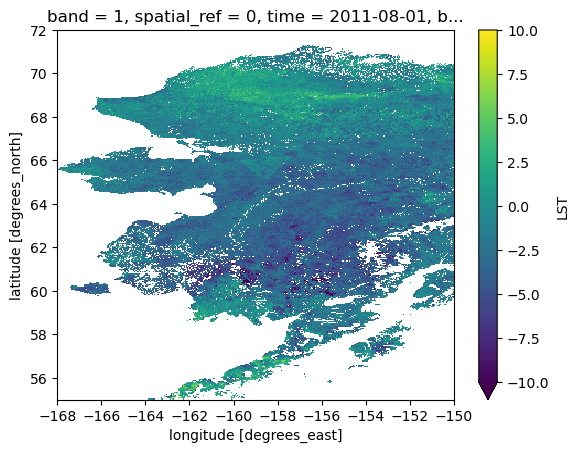

In [38]:
anomalies.sel(lat=slice(55,72), lon=slice(-168,-150)).isel(time=50).plot(vmax=10, vmin=-10);

In [ ]:
anomalies.sel(lat=slice(55,72), lon=slice(-168,-150)).isel(time=10).plot();

In [ ]:
anoms = anomalies.sel(lat=slice(55,72), lon=slice(-168,-150))
anoms = anoms.chunk(dict(time=-1))   # <<< REQUIRED

In [ ]:
time_frac = (
    anoms.time.dt.year
    + (anoms.time.dt.month - 0.5) / 12.0
)


In [ ]:
def theil_sen_1d(y, x):
    # remove NaNs
    mask = np.isfinite(y) & np.isfinite(x)
    
    # not enough data points → return NaN
    if mask.sum() < 5:
        return np.nan
    
    slope, intercept, lower, upper = theilslopes(y[mask], x[mask])
    return slope